In [1]:
import pandas as pd

df = pd.read_csv('Gold Price.csv')

print(df)

            Date   Price    Open    High     Low  Volume  Chg%
0     2026-01-02  135793  136143  137037  135525   51877  0.02
1     2026-01-01  135771  135687  135850  135001   14622  0.23
2     2025-12-31  135454  136526  136527  134866   59050  1.10
3     2025-12-30  133974  133185  134880  132853   36733  1.04
4     2025-12-29  132595  137628  138269  131695   90640 -3.77
...          ...     ...     ...     ...     ...     ...   ...
3099  2014-01-06   29119   29300   29395   29051   24380 -0.55
3100  2014-01-04   29279   29279   29279   29279       0 -1.51
3101  2014-01-03   29727   30031   30125   29539    3050 -0.83
3102  2014-01-02   29975   29678   30050   29678    3140  1.47
3103  2014-01-01   29542   29435   29598   29340    2930  0.25

[3104 rows x 7 columns]


In [2]:
print(df.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')


In [3]:
print(df.describe())

               Price           Open           High            Low  \
count    3104.000000    3104.000000    3104.000000    3104.000000   
mean    46263.721972   46250.184278   46515.665271   45997.234214   
std     22230.385519   22191.261855   22364.944669   22053.596236   
min     24545.000000   24583.000000   24635.000000   24470.000000   
25%     29358.750000   29331.500000   29462.750000   29214.000000   
50%     38832.500000   38902.500000   39083.000000   38626.500000   
75%     54970.250000   54900.000000   55211.250000   54730.500000   
max    137789.000000  137628.000000  138300.000000  136300.000000   

              Volume         Chg%  
count    3104.000000  3104.000000  
mean    14855.159472     0.052957  
std     14197.123722     0.854364  
min         0.000000    -5.980000  
25%      6780.000000    -0.370000  
50%     11520.000000     0.060000  
75%     18602.500000     0.480000  
max    149474.000000     5.300000  


In [4]:
gold_prices = df[['Date','Price']].copy()
print(gold_prices)

            Date   Price
0     2026-01-02  135793
1     2026-01-01  135771
2     2025-12-31  135454
3     2025-12-30  133974
4     2025-12-29  132595
...          ...     ...
3099  2014-01-06   29119
3100  2014-01-04   29279
3101  2014-01-03   29727
3102  2014-01-02   29975
3103  2014-01-01   29542

[3104 rows x 2 columns]


In [5]:
print(gold_prices.dtypes)

Date       str
Price    int64
dtype: object


In [8]:
gold_prices['Date'] = pd.to_datetime(gold_prices['Date'])
gold_prices.set_index('Date',inplace=True)
print(gold_prices.head())

             Price
Date              
2026-01-02  135793
2026-01-01  135771
2025-12-31  135454
2025-12-30  133974
2025-12-29  132595


In [11]:
print(gold_prices.resample(rule='ME').mean().head())

                   Price
Date                    
2014-01-31  29386.500000
2014-02-28  30184.450000
2014-03-31  30100.190476
2014-04-30  29199.521739
2014-05-31  28373.636364


Axes(0.125,0.2;0.775x0.68)


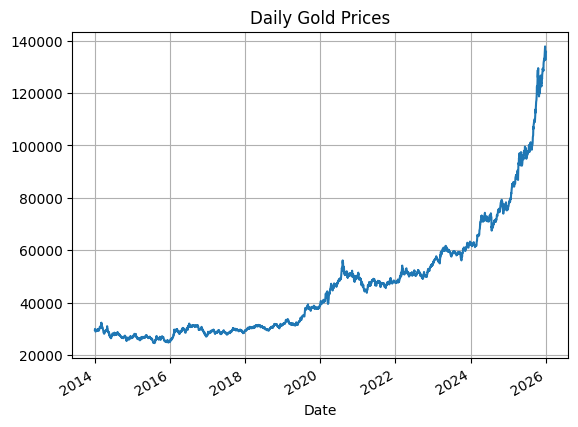

In [20]:

print(gold_prices.plot(grid=True,title='Daily Gold Prices',legend=False))

Axes(0.125,0.11;0.775x0.77)


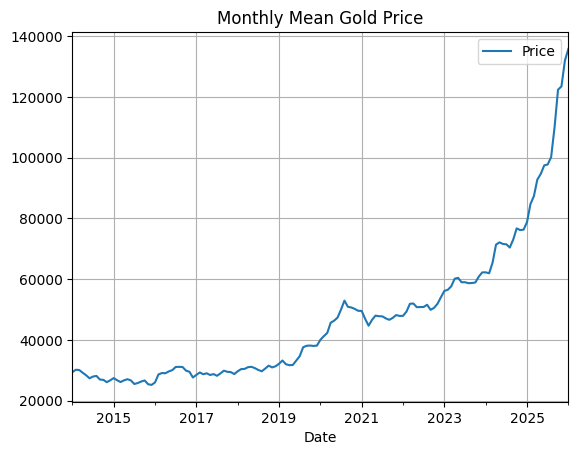

In [21]:
print(gold_prices.resample(rule='ME').mean().plot(grid=True,title='Monthly Mean Gold Price',legend=True))

Axes(0.125,0.11;0.775x0.77)


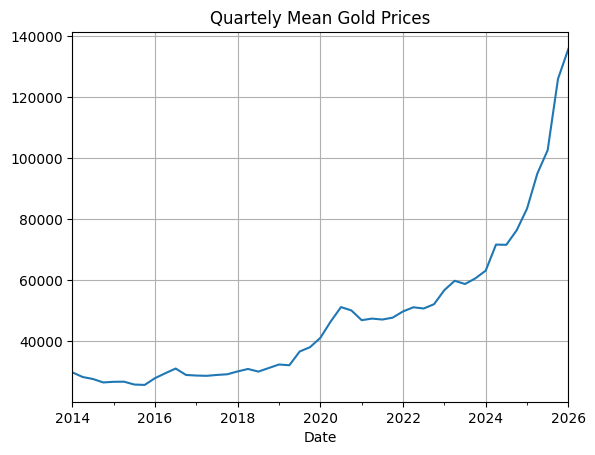

In [23]:
print(gold_prices.resample(rule='QE').mean().plot(grid=True,title='Quartely Mean Gold Prices',legend=False))

In [24]:
print(gold_prices.shift(2).head())

               Price
Date                
2026-01-02       NaN
2026-01-01       NaN
2025-12-31  135793.0
2025-12-30  135771.0
2025-12-29  135454.0


In [25]:
print(gold_prices.tail())

            Price
Date             
2014-01-06  29119
2014-01-04  29279
2014-01-03  29727
2014-01-02  29975
2014-01-01  29542


In [26]:
print(gold_prices.shift(-3).tail())

              Price
Date               
2014-01-06  29975.0
2014-01-04  29542.0
2014-01-03      NaN
2014-01-02      NaN
2014-01-01      NaN


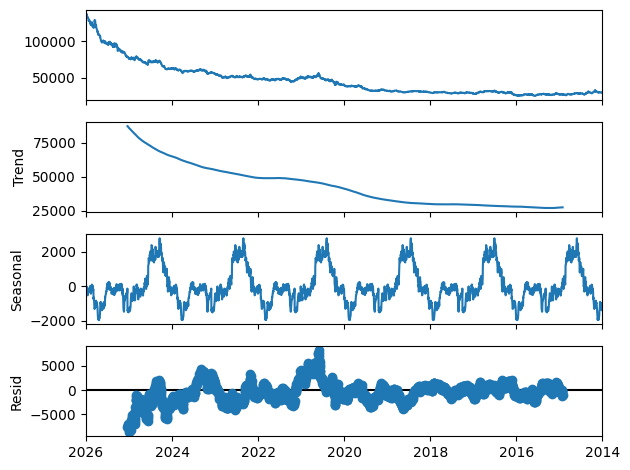

In [28]:
import statsmodels.api as sm
fig = sm.tsa.seasonal_decompose(gold_prices,model='additive',period=500).plot()

Axes(0.125,0.11;0.775x0.77)


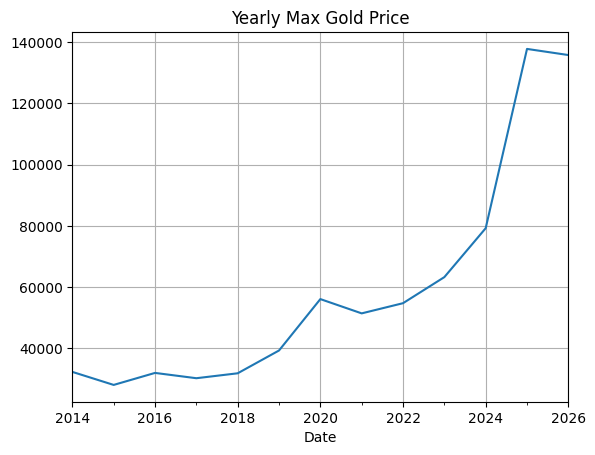

In [32]:
print(gold_prices.resample(rule='YE').max().plot(grid=True,title='Yearly Max Gold Price',legend=False))

Axes(0.125,0.11;0.775x0.77)


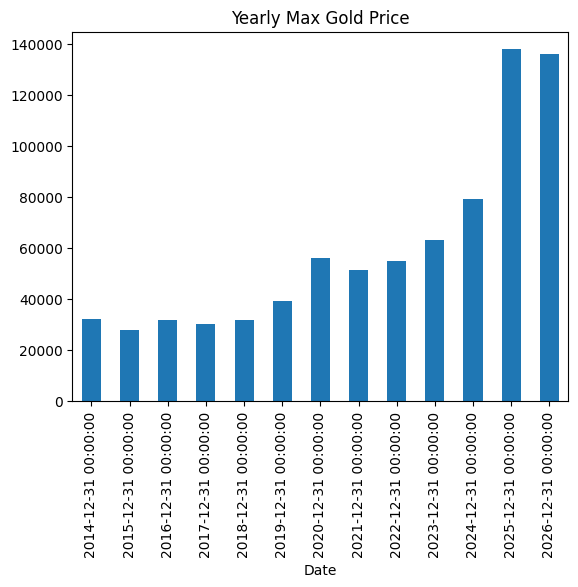

In [33]:
print(gold_prices.resample(rule='YE').max().plot(kind='bar',title='Yearly Max Gold Price',legend=False))

Axes(0.125,0.2;0.775x0.68)


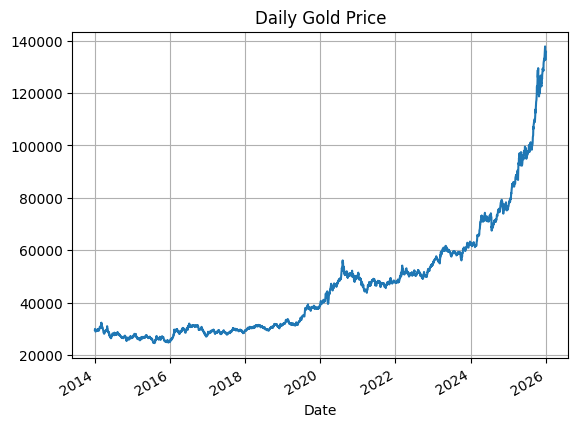

In [34]:
print(gold_prices.plot(grid=True,title='Daily Gold Price',legend=False))

Axes(0.125,0.2;0.775x0.68)


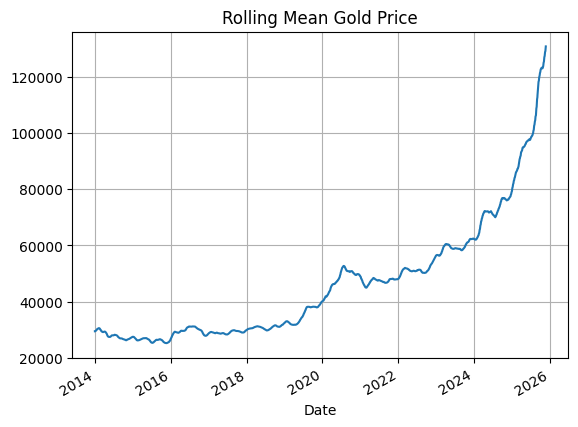

In [35]:
print(gold_prices.rolling(window=30).mean().plot(grid=True,title='Rolling Mean Gold Price',legend=False))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

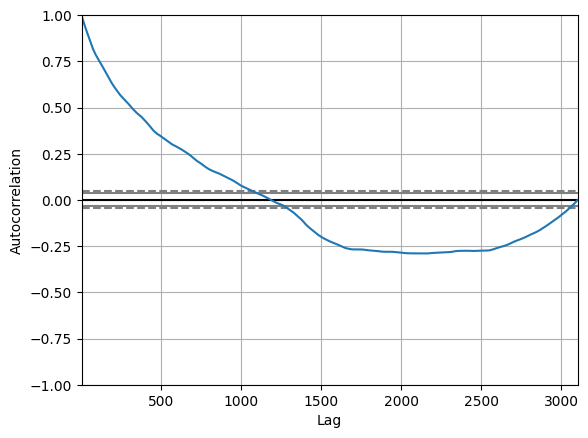

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gold_prices)

<Axes: title={'center': 'Yearly Gold Price stats'}>

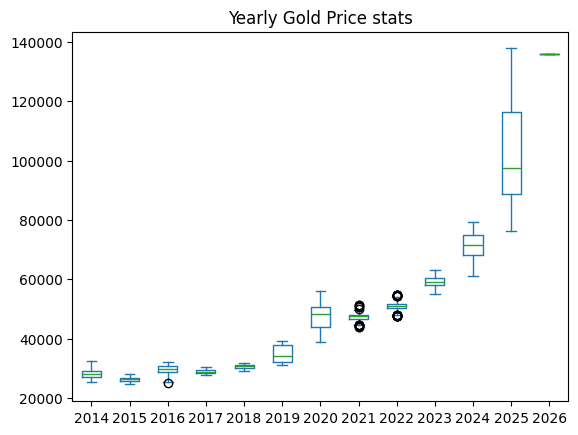

In [37]:
gold_prices['Year'] = gold_prices.index.year

pivot_gold_prices = gold_prices.pivot(columns='Year')
pivot_gold_prices.columns = pivot_gold_prices.columns.droplevel()
pivot_gold_prices.plot(kind='box',title='Yearly Gold Price stats')

<Axes: xlabel='Year', ylabel='Price'>

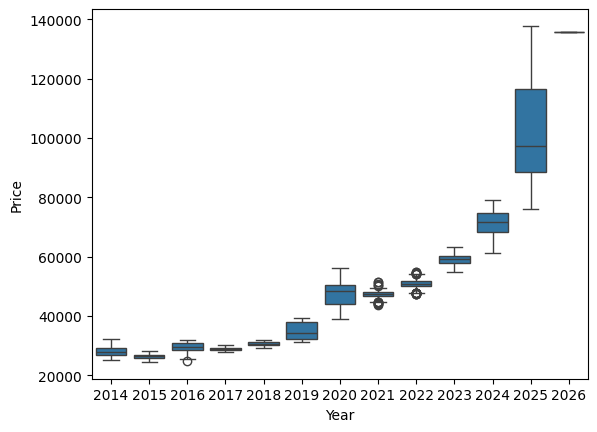

In [39]:
import seaborn as sns
sns.boxplot(data=gold_prices,x='Year',y='Price')

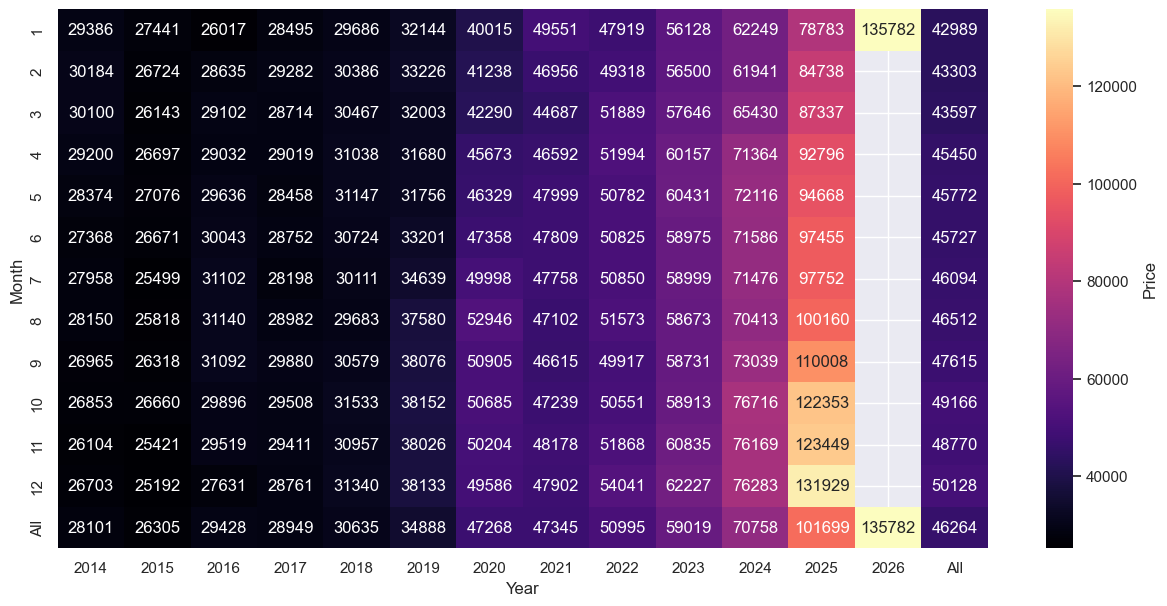

In [40]:
gold_prices['Month'] = gold_prices.index.month
 
pivot_table = pd.pivot_table(gold_prices, values=["Price"],
                             index=["Month"], columns=["Year"],
                             margins=True)

pivot_table.columns = pivot_table.columns.droplevel() 

sns.set(rc={'figure.figsize': (15, 7)})
ax = sns.heatmap(pivot_table, cmap='magma', fmt='.0f', annot=True, 
                 cbar_kws={'label':'Price'})
